### In this data set we see several data points that are being used to identify an unknown flower with a previously known class of flowers. The classes are numbered 0, 1, 2 and are identified as a target variable. The measures being taken into effect are the sepal length measured in centimeters, the sepal width also measured in centimeters, the petal length measured in centimeters, and finally the petal width measured in centimeters. The problem associated with this data set is the identification of flowers in the future based on a model being trained with this data set.

In [2]:
import pandas as pd
iris = pd.read_csv('/content/iris-2.csv')
iris.drop("Unnamed: 0", axis = 1, inplace=True)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
iris.target.drop_duplicates() #there are 3 flower species

0      0
50     1
100    2
Name: target, dtype: int64

In [4]:
response = iris['target']
features = iris.loc[:,'sepal length (cm)': 'petal width (cm)']

In [5]:
from sklearn.model_selection import train_test_split
features_train, features_test, response_train, response_test = train_test_split(features, response, test_size = 0.3, random_state = 0)

In [6]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(features_train, response_train)

DecisionTreeClassifier(random_state=0)

In [7]:
predictions = classifier.predict(features_test)
iris_pred = pd.DataFrame({'Actual': response_test, 'Predictions': predictions})
iris_pred.head()

,Actual,Predictions
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0


In [8]:
from sklearn.metrics import accuracy_score
print('Accuracy score on test data: ', accuracy_score(response_test, predictions))

Accuracy score on test data:  0.9777777777777777


In [9]:
from sklearn.metrics import confusion_matrix
idx = ['actual 0', 'actual 1', 'actual 2']

cm = pd.DataFrame(confusion_matrix(response_test, predictions),
                  columns = ['pred 0', 'pred 1', 'pred 2'],
                  index= idx)
cm

,pred 0,pred 1,pred 2
actual 0,16,0,0
actual 1,0,17,1
actual 2,0,0,11


In [10]:
cols = list(features.columns)
importance = pd.DataFrame({'features':cols, 'importance': classifier.feature_importances_})
importance

,features,importance
0,sepal length (cm),0.000000
1,sepal width (cm),0.021505
2,petal length (cm),0.397670
3,petal width (cm),0.580826


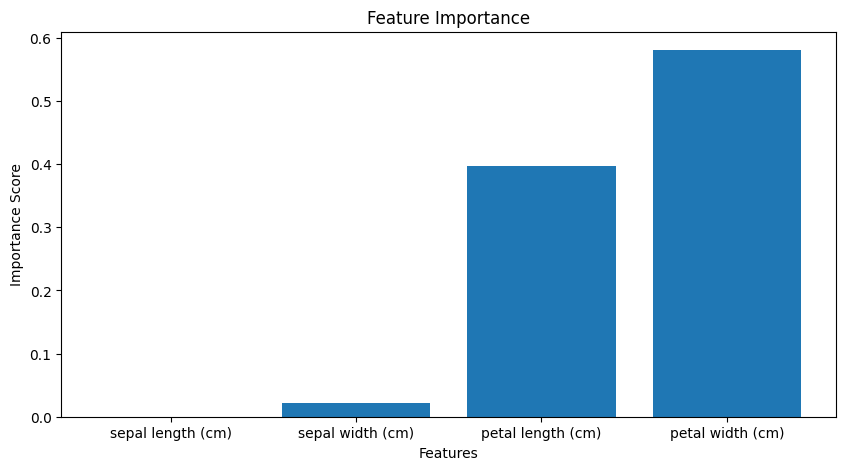

In [11]:
from matplotlib import pyplot as plt 
plt.figure(figsize=(10,5))
plt.bar(x = cols, height = classifier.feature_importances_)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

### The results of this analysis of the flower data, was able to create a over 97% accuracy. For the use of this model that accuracy is more than plenty and I would be able to recommend this model being used in the future for the identification of unknown flowers. I was also able to identify the relation between the individual measures of the flower and their association with the flowers classification. The two aspects that stood out from this analysis were the fact that steeple length had a near zero impact on the classification, and sepal width accounted for almost 60% of the classification metric.